In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import numpy as np
from tslearn.metrics import dtw, cdist_dtw
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, average, complete
from scipy.stats import spearmanr
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.covariance import LedoitWolf

# 1. Loading in the Data and Basic Analysis

## 1.1 Data Preprocessing

Load in the ETF return data and index return data

In [2]:
ETF_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFRetNEWERdates.csv", index_col=0)

In [3]:
Index_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-index_data.csv",index_col=0)

In [4]:
Mutual_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-MutualFundRet.csv",index_col=0)

In [5]:
ETF_data.head()

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,0.000092,-0.073457,-0.011585,-0.040176,0.007890,-0.014151,-0.004626,-0.012456,-0.016667,0.039955
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.016010,-0.056361,-0.004654,-0.045565,-0.020060,-0.020549,-0.036311,-0.005790,-0.027024,0.062946
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,0.003689,-0.030445,0.003751,-0.052264,0.008009,0.003998,-0.021828,0.013795,-0.014620,-0.000249
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.059568,-0.062250,-0.025591,-0.120739,-0.060048,-0.035232,-0.110973,-0.004802,-0.045082,0.035257
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.052510,0.041779,0.058124,0.036793,0.049401,0.033205,0.065079,0.034663,0.080125,-0.012111


In [6]:
Index_data.head(5)

,AsiaSMALL LoBO,AsiaME1 BO2,AsiaME1 BO3,AsiaME1 BO4,AsiaSMALL HiBO,AsiaME2 BO1,AsiaME2 BO2,AsiaME2 BO3,AsiaME2 BO4,AsiaME2 BO5,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
,,,,,,,,,,,,,,,,,,,,,
2000-11-15,-0.016350,0.004071,-0.019912,-0.014557,-0.017356,-0.012267,-0.024224,-0.016517,-0.015568,-0.012546,...,0.015049,0.013815,-0.042876,-0.034672,0.003267,0.001545,0.002784,0.003694,0.004148,0.005609
2000-11-22,0.006672,0.016849,0.016397,0.006049,0.003423,-0.006967,0.007591,0.006678,0.008349,0.002632,...,-0.037312,0.011465,-0.089051,-0.058248,0.003461,0.000998,0.001474,0.002552,0.004613,0.010358
2000-11-29,-0.029141,-0.024495,-0.017090,-0.031009,-0.024471,-0.051371,-0.020776,-0.005210,-0.022288,-0.026797,...,0.019825,-0.001677,-0.004267,0.006627,0.006869,0.003444,0.006166,0.007838,0.009037,0.010558
2000-12-06,-0.012367,-0.015601,-0.023586,-0.005379,-0.010344,-0.021430,-0.022750,-0.013214,0.021566,-0.011720,...,0.008048,-0.050099,0.001868,0.027445,0.002910,0.003071,0.004431,0.004902,0.004051,-0.002972
2000-12-13,0.000938,0.015727,0.020245,-0.002130,0.013378,0.011243,0.026620,0.014591,0.020863,0.014379,...,0.010919,0.033585,0.067698,0.006119,0.006227,0.002431,0.004328,0.006113,0.007530,0.014818


In [7]:
Mutual_data.head()

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
EndDate,,,,,,,,,,,,,,,,,,,,,
2014-09-17,-0.010665,-0.009281,-0.000938,0.000263,-0.000578,0.000414,-0.005513,-0.004706,0.003172,0.001160,...,-0.003328,-0.004566,-0.010929,0.001930,0.000205,-0.002745,-0.003924,0.001413,-0.001910,0.002181
2014-09-24,-0.001760,0.007648,-0.005283,0.001141,-0.009839,0.001892,0.002349,0.004111,-0.002259,0.011781,...,-0.001411,0.003823,-0.011845,-0.009631,-0.000307,0.000444,0.002771,0.002886,0.003614,0.001020
2014-10-01,-0.004334,0.006845,-0.004013,-0.000614,-0.020124,0.003422,-0.010967,0.004709,0.001207,0.013934,...,-0.020371,0.004570,-0.030966,-0.021478,0.000921,-0.009675,-0.011529,-0.002110,-0.005578,-0.013316
2014-10-08,-0.020955,-0.019812,-0.027491,0.000526,0.010652,0.001058,-0.000284,-0.029817,-0.014093,-0.000565,...,-0.025611,-0.028810,-0.027460,0.001123,0.000102,0.006364,0.001133,-0.018327,-0.020734,-0.007230
2014-10-15,-0.010852,-0.031494,-0.058609,0.000088,-0.026728,0.004229,-0.004077,-0.045856,-0.031035,0.004709,...,-0.047177,-0.046838,-0.025674,-0.034873,0.000511,-0.007838,-0.004452,-0.030093,-0.055326,-0.046054


The indexes are objects and we need to change them to daytime

In [9]:
ETF_data.index = pd.to_datetime(ETF_data.index, yearfirst=True)

In [10]:
Index_data.index = pd.to_datetime(Index_data.index, yearfirst=True)

In [11]:
Mutual_data.index = pd.to_datetime(Mutual_data.index, yearfirst=True)

Now we can join the two dataframes on the index of the ETF dataframe.

In [12]:
joined = ETF_data.join(Index_data)

In [13]:
joined = joined.join(Mutual_data)

In [14]:
joined

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,-0.001411,0.003823,-0.011845,-0.009631,-0.000307,0.000444,0.002771,0.002886,0.003614,0.001020
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.020371,0.004570,-0.030966,-0.021478,0.000921,-0.009675,-0.011529,-0.002110,-0.005578,-0.013316
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,-0.025611,-0.028810,-0.027460,0.001123,0.000102,0.006364,0.001133,-0.018327,-0.020734,-0.007230
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.047177,-0.046838,-0.025674,-0.034873,0.000511,-0.007838,-0.004452,-0.030093,-0.055326,-0.046054
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.035132,0.036036,0.022725,0.027994,-0.000818,0.009874,0.007858,0.035738,0.057722,0.033081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,0.039342,-0.009836,0.003925,0.000295,-4.023450e-03,-0.036260,0.003270,0.026008,-0.007661,0.008965,...,-0.013611,0.026084,-0.012514,-0.016505,0.008089,0.086825,0.008524,0.044582,0.014231,0.034905
2020-04-08,0.047920,0.082964,0.040419,0.048054,6.284270e-02,0.061844,0.038214,0.095140,0.009623,0.014833,...,0.092650,0.054592,0.097190,0.054221,0.000857,-0.009191,0.001457,0.044024,0.067358,0.034978
2020-04-15,0.051029,0.001320,0.005950,0.003265,2.997190e-03,-0.014426,0.024061,0.019808,-0.004752,0.015044,...,-0.019564,0.011432,-0.036308,0.012977,0.002986,0.052970,0.017455,0.015999,0.027037,0.043415
2020-04-22,-0.014878,0.014925,0.007998,0.012831,1.413391e-02,0.028546,0.015500,0.075722,0.007998,0.005898,...,0.007023,0.022581,0.002689,0.035541,0.000731,-0.011144,-0.022150,0.012041,0.014363,-0.026021


In [15]:
joined.index.dtype

dtype('<M8[ns]')

We only have the index data until the 2019-04-10 so we need to cut the end of the dataframe.

In [16]:
enddate = "04-11-2019" 

joined = joined[joined.index < enddate]

joined.tail()

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
2019-03-13,-0.000617,0.006665,0.003033,0.005002,0.006041,-0.032574,0.004032,0.031632,-0.001123,0.004032,...,0.004263,0.006325,-0.004204,0.006590,0.000827,-0.002036,0.004280,0.003327,0.006798,-0.000674
2019-03-20,-0.001074,-0.000407,0.000162,0.000214,-0.001426,0.022585,-0.003883,-0.012407,-0.007473,-0.001096,...,-0.004453,-0.000700,0.021577,0.002490,-0.000700,0.003071,0.007535,0.002614,0.010251,0.010852
2019-03-27,0.014981,0.008535,0.016752,0.014981,0.012026,-0.020018,0.031247,-0.020677,0.015535,0.024239,...,0.001368,-0.004717,-0.014878,-0.007181,0.001547,0.001217,0.002709,0.014912,0.004706,-0.002145
2019-04-03,0.007966,0.019795,0.004954,0.008053,0.013855,0.083112,-0.010384,0.045146,0.001184,-0.005459,...,0.023469,0.028419,0.012892,0.039850,-0.001446,0.002840,0.003639,0.007703,0.031602,0.019419
2019-04-10,0.004224,0.000103,0.000641,0.000528,0.000815,0.008223,0.002888,0.002351,-0.002967,0.001022,...,0.000775,-0.003768,0.015407,0.004907,0.000229,0.002941,-0.000469,-0.002984,-0.001650,0.002902


## 1.2 Return and Standard Deviation <a class="anchor" id="two.one"></a>

Calculate the average yearly return for each asset.

In [17]:
Columns = joined.columns #the columns in the new dataframe are the indexes
ret = pd.DataFrame(columns=Columns) #create an empty dataframe
ret = ret.transpose()

In [18]:
valueslist=[]

for i in range(0, joined.shape[1]):
    counter = 0
    value=1
    for j in range(1,joined.shape[0]):
        value=value*(joined.iloc[j,i]+1)
        counter=counter+1
        
    valueslist.append((1+value**(1/counter)-1)**52-1)
    
ret["AvgReturnYearly"]=valueslist

Calculate the yearly standard deviation for each index.

In [19]:
import math
ret["YearlyStd"] = joined.std()*math.sqrt(52)

In [20]:
ret.head()

,AvgReturnYearly,YearlyStd
ANGL,0.098036,0.107899
AOA,0.095044,0.126374
AOK,0.067064,0.090789
AOM,0.074388,0.095870
AOR,0.086896,0.109767


Lets make a scatter plot of the standard deviation vs. the return

In [23]:
# Here we define classes so we can color the index points in red and the ETF points in blue
classes = np.empty(joined.shape[1])

for i in range(0, joined.shape[1]):
    if i in range(0,ETF_data.shape[1]):
        classes[i] = 1
    elif i in range(ETF_data.shape[1],ETF_data.shape[1]+180):
        classes[i] = 2
    else:
        classes[i] = 3
    

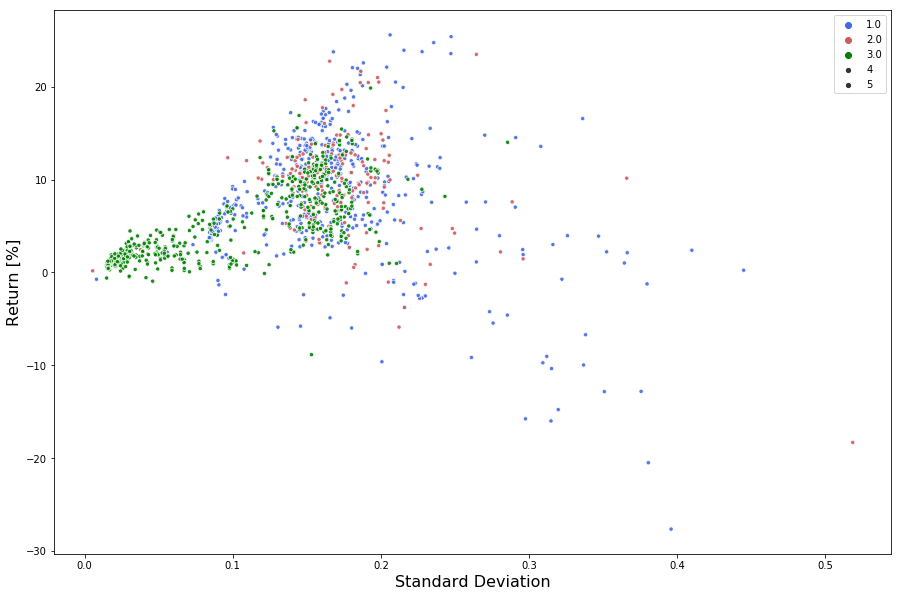

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=ret["AvgReturnYearly"]*100, x=ret["YearlyStd"], hue=classes, palette=["royalblue", "indianred", "green"], alpha=0.9,size = 5)
#plt.title("Yearly Standard Deviation vs. Yearly Returns")
#plt.legend(["ETF"],["Index"])
plt.ylabel("Return [%]", fontsize=16)
plt.xlabel("Standard Deviation", fontsize =16)
plt.show()



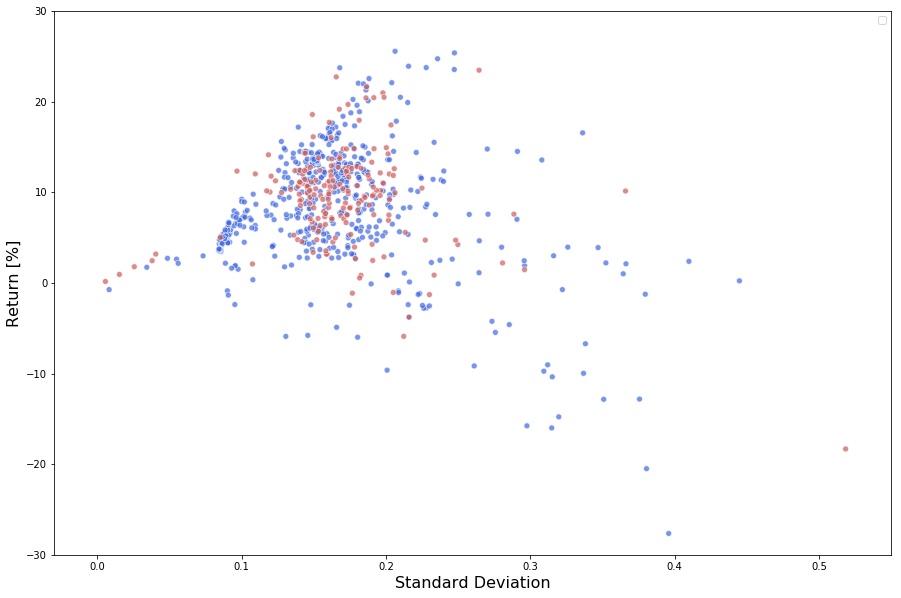

In [132]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=ret.iloc[:ETF_data.shape[1]+180,:]["AvgReturnYearly"]*100, x=ret.iloc[:ETF_data.shape[1]+180,:]["YearlyStd"], hue=classes[:ETF_data.shape[1]+180], palette=["royalblue", "indianred"], alpha=0.7,s = 35)
#plt.title("Yearly Standard Deviation vs. Yearly Returns")
plt.legend(["ETF"],["Index"])
plt.ylabel("Return [%]", fontsize=16)
plt.xlabel("Standard Deviation", fontsize =16)
plt.ylim(-30,30)
plt.xlim(-0.03,0.55)
plt.show()


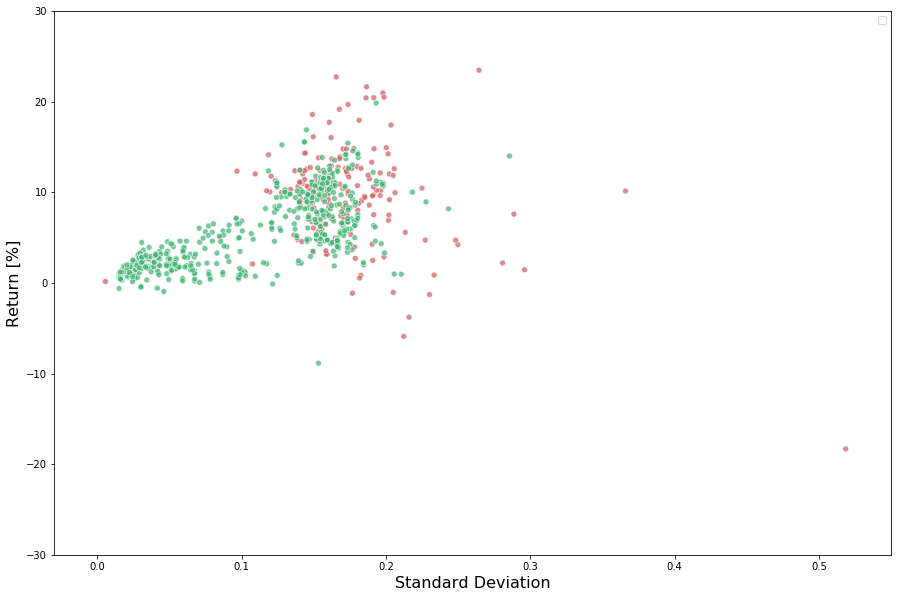

In [135]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=ret.iloc[ETF_data.shape[1]:,:]["AvgReturnYearly"]*100, x=ret.iloc[ETF_data.shape[1]:,:]["YearlyStd"], hue=classes[ETF_data.shape[1]:], palette=["indianred", "mediumseagreen"], alpha=0.7,s= 35)
#plt.title("Yearly Standard Deviation vs. Yearly Returns")
plt.legend(["ETF"],["Index"])
plt.ylabel("Return [%]", fontsize=16)
plt.xlabel("Standard Deviation", fontsize =16)
plt.ylim(-30,30)
plt.xlim(-0.03,0.55)
plt.show()

In [65]:
classes

array([1., 1., 1., ..., 3., 3., 3.])

In [27]:
ret[0:ETF_data.shape[1]]

,AvgReturnYearly,YearlyStd
ANGL,0.098036,0.107899
AOA,0.095044,0.126374
AOK,0.067064,0.090789
AOM,0.074388,0.095870
AOR,0.086896,0.109767
...,...,...
XRT,0.051979,0.197673
XSD,0.235663,0.247234
XSLV,0.161552,0.155900
XTN,0.102638,0.217108


It looks like there is an upwards trend in the standard deviation vs. return. What is the correlation between these factors?

In [32]:
ret.corr()

,AvgReturnYearly,YearlyStd
AvgReturnYearly,1.000000,0.259573
YearlyStd,0.259573,1.000000


## 1.3 Plotting cumulative return series

Lets create a new dataframe with cumulative returns over the timeperiod. And use the cumprod() function to calculate the cumulative product.

In [33]:
joined_cumprod=joined.copy()

joined_cumprod=(joined+1).cumprod()

joined_cumprod = joined_cumprod-1

We want to look at the return series for the ETF data and index data.

**Plot the cmulative return of the index and ETF data.**

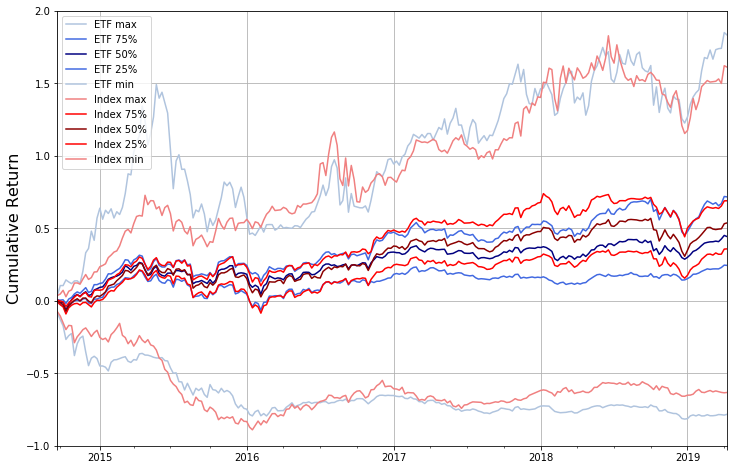

In [78]:
ax = joined_cumprod.iloc[:,:ETF_data.shape[1]].transpose().describe().T.drop(["count","std","mean"], axis=1).plot(figsize=(12,8),grid=True,color=["lightsteelblue", "royalblue", "navy", "royalblue", "lightsteelblue"], label=["ETF min", "ETF 25%", "ETF 50%", "ETF 75%", "ETF max"])
joined_cumprod.iloc[:,ETF_data.shape[1]:ETF_data.shape[1]+180].transpose().describe().T.drop(["count","std","mean"], axis=1).plot(figsize=(12,8),grid=True, ax=ax, color=["lightcoral", "red", "darkred", "red", "lightcoral"])
ax.set_ylabel("Cumulative Return", fontsize = 16)
ax.set_ylim(-1,2)
ax.legend(("ETF max", "ETF 75%", "ETF 50%", "ETF 25%", "ETF min", "Index max", "Index 75%", "Index 50%", "Index 25%", "Index min"))


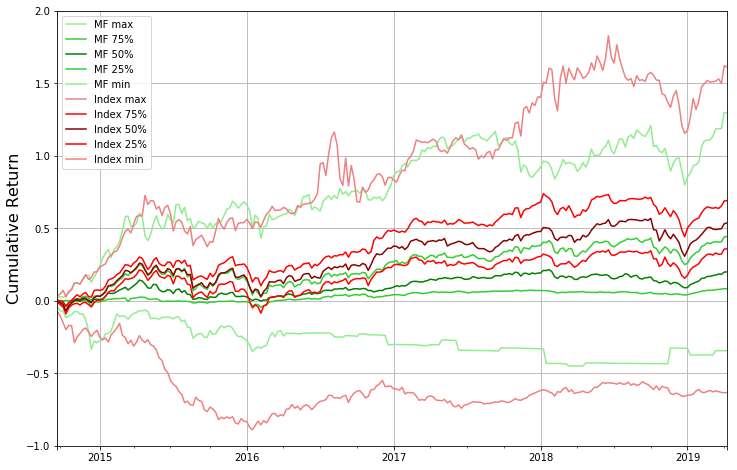

In [51]:
ax = joined_cumprod.iloc[:,ETF_data.shape[1]+181:].transpose().describe().T.drop(["count","std","mean"], axis=1).plot(figsize=(12,8),grid=True, color=["lightgreen", "limegreen", "green", "limegreen", "lightgreen"])
joined_cumprod.iloc[:,ETF_data.shape[1]:ETF_data.shape[1]+180].transpose().describe().T.drop(["count","std","mean"], axis=1).plot(figsize=(12,8),grid=True, ax=ax, color=["lightcoral", "red", "darkred", "red", "lightcoral"])
ax.set_ylabel("Cumulative Return", fontsize = 16)
ax.set_ylim(-1,2)
ax.legend(("MF max", "MF 75%", "MF 50%", "MF 25%", "MF min", "Index max", "Index 75%", "Index 50%", "Index 25%", "Index min"))
